# Homework 1- Coding Part 1
<font color="red"> due on Mar 21 11:59 PM </font><br>
name the notebook as ``<your unique name>_hw1.ipynb``<br>
total points: 20

In [1]:
# Replace ? in the following code with your uniqname.
MY_UNIQNAME = 'zhyiyang'

## 1 Python Basis (1 point)

1.1 Write a Python script to concatenate following dictionaries to create a new one<br>
Sample Dictionary :<br> 
dict1={1:10, 2:20} <br>
dict2={3:30, 4:40} <br>
dict3={5:50,6:60} <br>
Expected Result : {1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60}

In [19]:
dict1={1:10, 2:20} 
dict2={3:30, 4:40} 
dict3={5:50, 6:60} 

# Please write your code here
dict_concatenate = {}
dict_concatenate.update(dict1)
dict_concatenate.update(dict2)
dict_concatenate.update(dict3)
print(dict_concatenate)

{1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60}


## 2 Numpy Basis (4 points)

In [3]:
import numpy as np

#### 2.1 Create an array of 20 linearly spaced points between 0 and 1

In [4]:
# Please write your code here
np.linspace(0, 1, 20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

#### 2.2 Use NumPy to generate an array of 25 random numbers sampled from a standard normal distribution

In [5]:
# Please write your code here
rand_num = np.random.normal(0,1,25)
print(rand_num)

[-0.43218218 -1.22329571  0.31807942 -0.40897365  1.75533662  0.27334301
 -0.23862303  0.57200192 -0.49582049 -0.30394167 -1.24646002  0.32177463
 -0.40774844  0.25563252 -0.65361938 -0.67420587  0.30808165  0.53389716
  0.28167747 -0.91822838  0.97092339 -0.31974526 -1.16847466  2.10243318
  0.61350363]


#### 2.3 Distance matrix 
Let's compute a ``pairwise Euclidean distance matrix`` for feature vectors $X \in \mathbb{R}^{n \times d}$:

We want to have a distance matrix $D(i, j) \in \mathbb{R}^{n \times n}$ such that
$$
  D(i, j) = \sqrt{ \sum_k (X[i, k] - X[j, k])^2 }
$$

the feature matrix is already given bellow
define a function called ``compute_distance`` to do this, and print the D matrix

In [6]:
# run this cell first
#!pip install scikit-learn
from sklearn.datasets import load_iris
X, _ = load_iris(return_X_y=True)
X.shape

(150, 4)

In [7]:
def compute_distance(X):
    # Please write your code here
    import sklearn.metrics
    D = sklearn.metrics.pairwise.euclidean_distances(X)
    return D   
print(compute_distance(X))

[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


## 3 Pandas Basis (5 points)

In [8]:
import pandas as pd
import numpy as np

#### 3.1 Compute Sharpe ratio
Read the file: ``IBM_SP500_04_14_daily_netRtns.csv``. Compute the sharpe ratio of IBM stock during ``2013-01-02`` to ``2013-12-31``

In [9]:
# Please write your code here
data = pd.read_csv("IBM_SP500_04_14_daily_netRtns.csv", index_col="Date", parse_dates=True)
# As we are not given the risk-free rate, we assume it to be 0
data_IBM = data["IBM"]["2013-01-02":"2013-12-31"]
sharpe_R = data_IBM.mean()/data_IBM.std()
print(sharpe_R)

0.00534047202372958


## 4 Exploratory Data Analysis (10 points)

In this data project we will focus on exploratory data analysis of stock prices.
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In this section we will learn how to use pandas to directly read data from ``Yahoo`` finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**)*

In [10]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 4.0 Please define a class called ``StockVisualizer`` to do the following questions

In [11]:
# Please write your code here

class StockVisualizer:
    def __init__(self, tickers, start, end, api_key="yahoo"):
        """
        tickers: list             |  tickers of stocks we need
        start: datetime.datetime  |  start time of the data we may need
        end:   datetime.datetime  |  end time of the data we may need
        """
        self.api = api_key
        self.bank_stocks = None
        self.tickers = tickers
        self.start = start # datetime.datetime object
        self.end = end # datetime.datetime object
    
    
    def load_data(self):
        """
        load the data of stocks appeared in the tickers
        return: None
        """
        # Please write your code here
        stockdata = pd.DataFrame()
        for i in self.tickers:
            stockdata = data.DataReader(self.tickers, self.api, self.start, self.end)
        return stockdata
        
        
    def get_returns(self):
        """
        after loading the stock data, compute the daily returns of each stock
        return: pd.DataFrame object  |  daily returns
        """
        # Please write your code here
        data_info = self.load_data()
        daily_returns = pd.DataFrame()
        for i in self.tickers:
            daily_returns = pd.concat([daily_returns,data_info["Adj Close"][i].pct_change()],axis = 1)
            daily_returns = daily_returns.dropna()
        return daily_returns
        
    
    def stocks_line_plot(self, tickers, info="Close"):
        """
        plot the stock data with line plot
        tickers: list | ticker of stocks to be plot
        info:    str  | target stock information, e.g. Close, Open, etc
        return: None
        """
        # Please write your code here
        data_info = self.load_data()
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        for i in tickers:
            ax.plot(data_info[info][i], label=i)
        ax.legend()
        ax.set_title("Close price for each bank")
        
    
    def plot_moving_avg(self, ma_start, ma_end, n, ticker, info="Close"):
        """
        plot the daily prices and its moving average for given stock at given period
        ma_start: datetime.datetime | start time
        ma_end:   datetime.datetime | end time
        n:        int               | days of moving average window
        ticker:   str               | stock ticker
        info:     str               | target stock information, e.g. Close, Open, etc
        """
        # Please write your code here
        data_info = self.load_data()
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        data_ticker = data_info[info][ticker].loc[ma_start:ma_end]
        data_ma = data_ticker.rolling(n).mean().dropna()
        ax.plot(data_ma, label=ticker)
        ax.legend()
        ax.set_title(f"MA for {ticker}")

#### 4.1 Get Data

- Get the stock information for 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'
- e.g. We need to get data using pandas datareader. We will get stock information for ``CitiGroup``.
- Get the stock data from ``01/01/2006 to 01/01/2016``.
- Named the stock data by its ticker: ``C``

Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions
    
    # Bank of America
    Use datetime to set start and end datetime objects.
    Then,
    BAC = data.DataReader("BAC", 'yahoo', start, end)

In [12]:
# Please write your code here
CitiGroup = StockVisualizer(["BAC", "C", "GS", "JPM", "MS", "WFC"], "01/01/2006", "01/01/2016")
CitiGroup.load_data()

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  34.425114  376.303406  105.273788  26.974699  36.786667   
2006-01-04  34.059509  369.355927  103.819702  26.818987  36.811905   
2006-01-05  34.103382  371.188354  103.778839  26.900234  36.912865   
2006-01-06  34.052204  371.188354  105.249245  27.089762  36.950710   
2006-01-09  34.074108  369.432373  106.515495  27.529747  37.341850   
...               ...         ...         ...        ...        ...   
2015-12-24  15.574412   46.672905  166.806946  57.445694  28.555326   
2015-12-28  15.448163   46.380703  166.029938  57.255939  28.282784   
2015-12-29  15.583436   46.911987  167.775925  57.851109  28.616871   
2015-12-30  15.376013   46.309872  166.386414  57.437080  28.335531   
2015-12-31  15.177611   45.822861  164.759216  56.954060  27.966284   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.658106  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.418499  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.395836  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.515644  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.512400  46.599998  483.899994  130.389999  40.669998  ...   
...               ...        ...         ...         ...        ...  ...   
2015-12-24  46.234390  17.270000   52.709999  182.470001  66.599998  ...   
2015-12-28  46.116322  17.129999   52.380001  181.619995  66.379997  ...   
2015-12-29  46.630783  17.280001   52.980000  183.529999  67.070000  ...   
2015-12-30  46.293434  17.049999   52.299999  182.009995  66.589996  ...   
2015-12-31  45.846439  16.830000   51.750000  180.229996  66.029999  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   
...                ...        ...        ...        ...         ...   
2015-12-24  182.270004  66.620003  32.570000  54.970001  29369400.0   
2015-12-28  181.770004  66.290001  32.360001  54.549999  41777500.0   
2015-12-29  182.820007  66.839996  32.439999  55.110001  45670400.0   
2015-12-30  183.279999  67.040001  32.500000  55.270000  35066400.0   
2015-12-31  181.160004  66.190002  31.910000  54.509998  47153000.0   

Attributes                                                            
Symbols              C         GS         JPM         MS         WFC  
Date                                                                  
2006-01-03   1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04   1870960.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05   1143160.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06   1370210.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09   1680740.0  4723500.0  16575200.0  4144500.0   5619600.0  
...                ...        ...         ...        ...         ...  
2015-12-24   4671200.0  1107600.0   4468200.0  2798200.0   4999400.0  
2015-12-28   8761700.0  1723300.0   6610600.0  5420300.0   8288800.0  
2015-12-29  10155100.0  1848900.0   9820800.0  6388200.0   7894900.0  
2015-12-30   8763300.0  1514300.0   7190700.0  5057200.0   8016900.0  
2015-12-31  11281800.0

#### 4.2 Compute Returns
Create a new DataFrame called ``returns``. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

hint: can use ``pct_change()`` method to get returns

In [13]:
# Please write your code here
CitiGroup.get_returns()

D:\Anaconda\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BAC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
D:\Anaconda\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BAC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


,BAC,C,GS,JPM,MS,WFC
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005773,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000394,0.003029,0.002743,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000643,-0.004731,0.012031,0.016242,0.010585,-0.000158
2006-01-10,-0.008368,0.003100,0.012577,0.001476,0.000507,-0.000789
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008106,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156
2015-12-30,-0.013310,-0.012835,-0.008282,-0.007157,-0.009831,-0.007234


#### 4.3 Create a pairplot using seaborn of the returns dataframe.

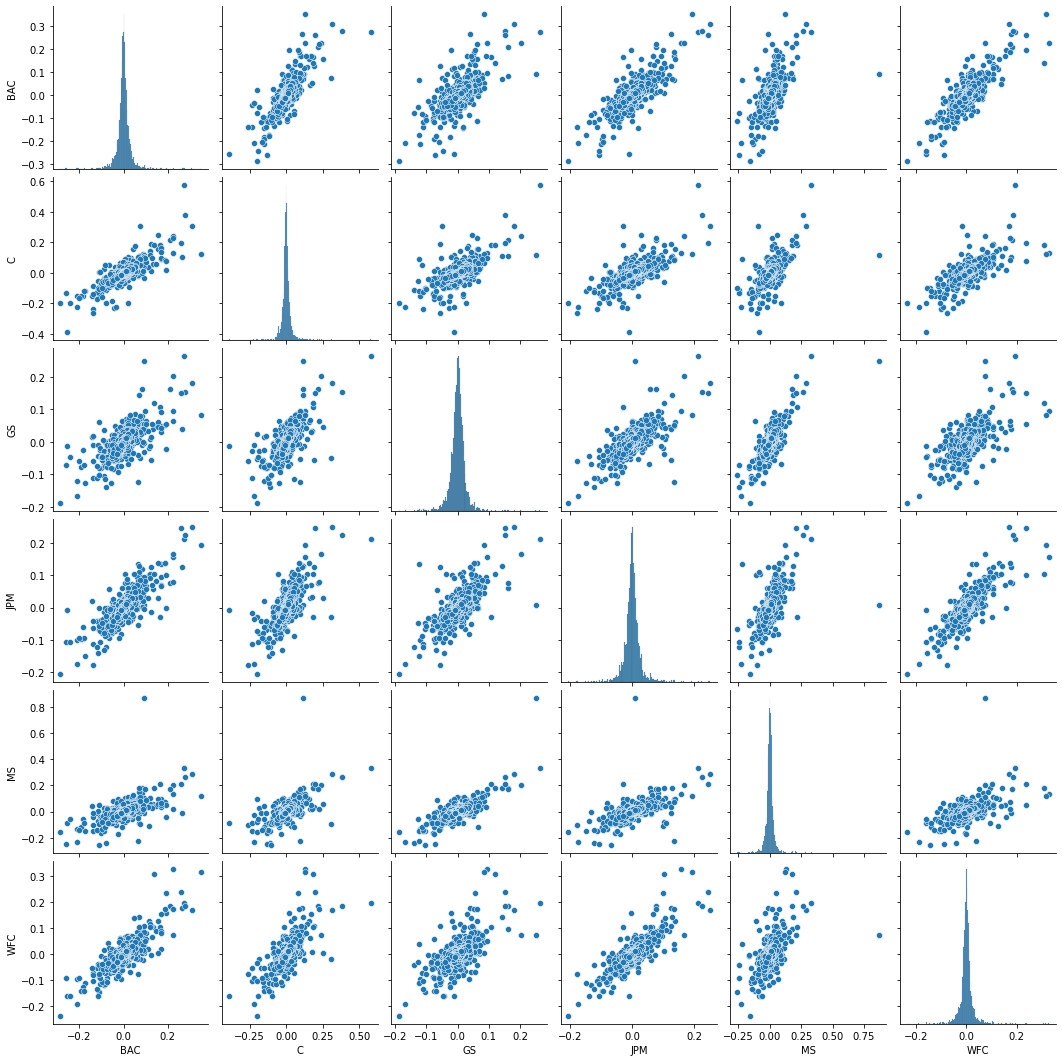

In [14]:
# Please write your code here
daily_return = CitiGroup.get_returns()
plt1 = sns.pairplot(daily_return)

#### 4.4 plot the distribution of BOA return from 2015-01-01 to 2015-12-31

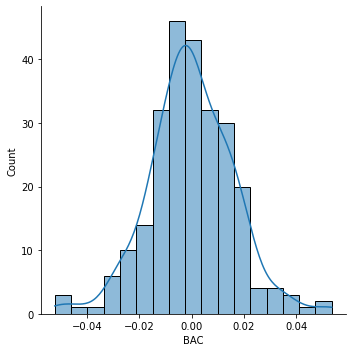

In [15]:
# Please write your code here
sns.displot(daily_return['BAC']["2015-01-01":"2015-12-31"], kde = True)

#### 4.3 Basic Statistics
Find the ``best and worst single day returns`` and ``coresponding date`` for each stock. Find the standard deviation of the returns for each stock.

In [16]:
# Please write your code here
for i in ["BAC", "C", "GS", "JPM", "MS", "WFC"]:
    print(f"For {i} ===================================================")
    print(f"The best single day return of {i} is {daily_return[i].max()},\
which happened at {daily_return[i][daily_return[i].values == daily_return[i].max()].index[0]}")
    print(f"The worst single day return of {i} is {daily_return[i].min()}, \
which happened at {daily_return[i][daily_return[i].values == daily_return[i].max()].index[0]}")

For BAC ===================================================
The best single day return of BAC is 0.35269157360522874,which happened at 2009-04-09 00:00:00
The worst single day return of BAC is -0.2896938072048141, which happened at 2009-04-09 00:00:00
For C ===================================================
The best single day return of C is 0.5782491591576944,which happened at 2008-11-24 00:00:00
The worst single day return of C is -0.3902437422625632, which happened at 2008-11-24 00:00:00
For GS ===================================================
The best single day return of GS is 0.26467759180200723,which happened at 2008-11-24 00:00:00
The worst single day return of GS is -0.18959601340819188, which happened at 2008-11-24 00:00:00
For JPM ===================================================
The best single day return of JPM is 0.25096708095833087,which happened at 2009-01-21 00:00:00
The worst single day return of JPM is -0.20727421407032776, which happened at 2009-01-21 00:00:00


#### 4.4 Visualization
- Create a line plot showing ``Close price`` for each bank for the entire index of time.

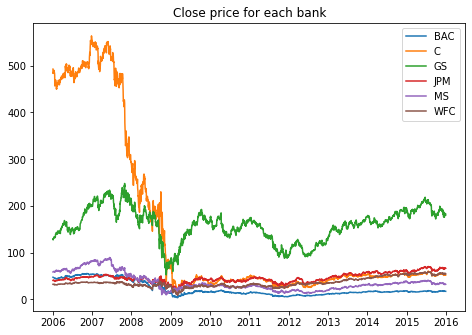

In [17]:
# Please write your code here
CitiGroup.stocks_line_plot(["BAC", "C", "GS", "JPM", "MS", "WFC"],"Close")

#### 4.5 Moving Averages (Optional, 2 points)


Let's analyze the moving averages for these stocks in the year 2008. 

Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

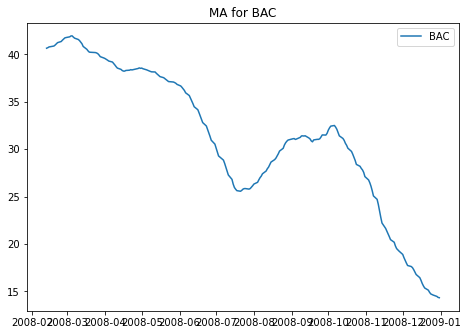

In [18]:
# Please write your code here
CitiGroup.plot_moving_avg("2008-01-01", "2008-12-31", 30, "BAC")